Vehicle Sales and Market Trends Dataset
Data Source: 
Data Set: car_prices.csv

About the Data: The data set several columns that represent vechicle sales and market trends between 1982 and 2015.

- Year: Year of car model
- Make: Car manufactuer
- Model: Specific model of car
- Trim: Trim level or version of model 
- Transmission: type of transmission (automatic or manual)
- VIN: Vechile Identification Number
- State: State where car is located
- Condition: Conditio of the car ( numerical rating)
- Odometer: Mileage of car in miles 
- Color: Exterior car color
- Interior: Interior car color 
- Seller: Seller or company selling the car
- MMR: Manheim Market Report value, which estimates the car’s value.
- Selling Price: Final Selling Price
- Sale Date: Date of Sale

Objective: To provide an exploratory data analysis (EDA) for car prices, including trends in car selling prices, the relationship between condition, odometer readings, and final price, as well as the impact of car make, model, and year on the price.

Key Metrics: Key Metrics for EDA:
Selling price trends: Analyze how selling prices vary by year, make, and model.
Condition and Odometer Impact: Examine how the condition rating and mileage (odometer) influence selling prices.
MMR vs Selling Price: Analyze the difference between MMR and actual selling price.
Sales over Time: Investigate the distribution of sales over time, looking for trends in certain periods (seasonality).


In [3]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load data
df = pd.read_csv("car_prices.csv")
df.head(5) #preview data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
print(df.shape)

(558837, 16)


In [6]:
#Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
#Entries: 558837
#Columns: 16 including Year, Make, Model, Trim, etc
#Data Types: Majority object 

In [8]:
#Statiscial Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


Year: The car models range from 1982 to 2015, with a mean year of 2010.

Condition: The condition of cars is measured on a scale, with an average of around 30.67 and a maximum condition rating of 49.

Odometer: The mileage ranges from as low as 1 mile to almost 1 million miles, with a median around 52,254 miles.

MMR: The Manheim Market Report value ranges from $25 - $182,000, with an average around $13,769.

Selling Price: The actual selling prices range from $1 - $230,000, with a median selling price around $12,100.

In [10]:
#Check for the Missing Value
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [11]:
# Drop rows that contain any missing values
df_cleaned = df.dropna()

# Check if missing values are handled
print(df_cleaned.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


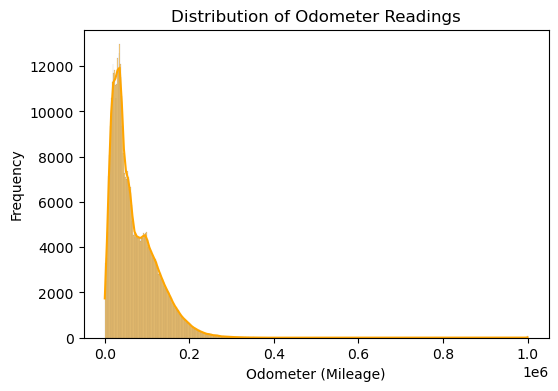

In [12]:
# Histogram of Odometer Readings Distribution
plt.figure(figsize=(6, 4))  # Set the figure size
sns.histplot(df['odometer'], kde=True, color='orange')  # Odometer histogram with Kernel Density Estimate
plt.title('Distribution of Odometer Readings')  # Add title
plt.xlabel('Odometer (Mileage)')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.show()  # Display the plot

The majority of vehicles have low mileage, with the highest frequency within the 0 to 100,000-mile range. 

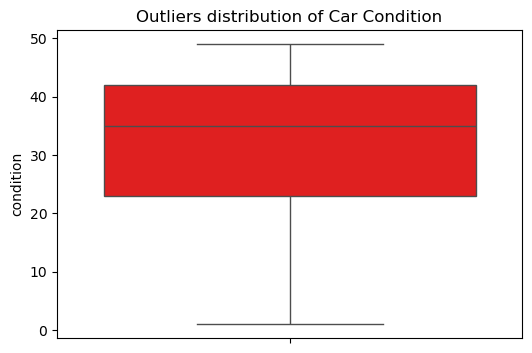

In [14]:
#Count Plot for categorical column
plt.figure(figsize=(6, 4))  
sns.boxplot(df['condition'], color='red')
plt.title('Outliers distribution of Car Condition')
plt.show()

The majority of the car condition ratings fall between approximately 30 and 40.

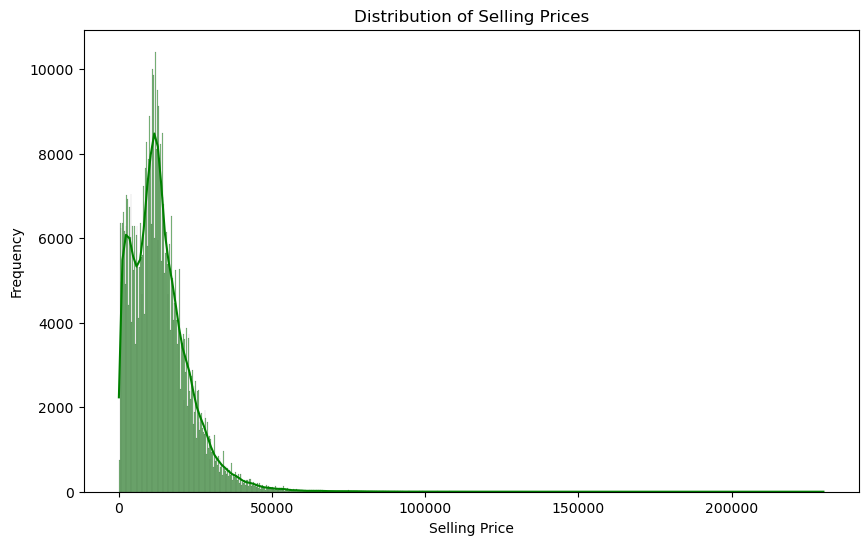

In [21]:
# Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], kde=True, color='green')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

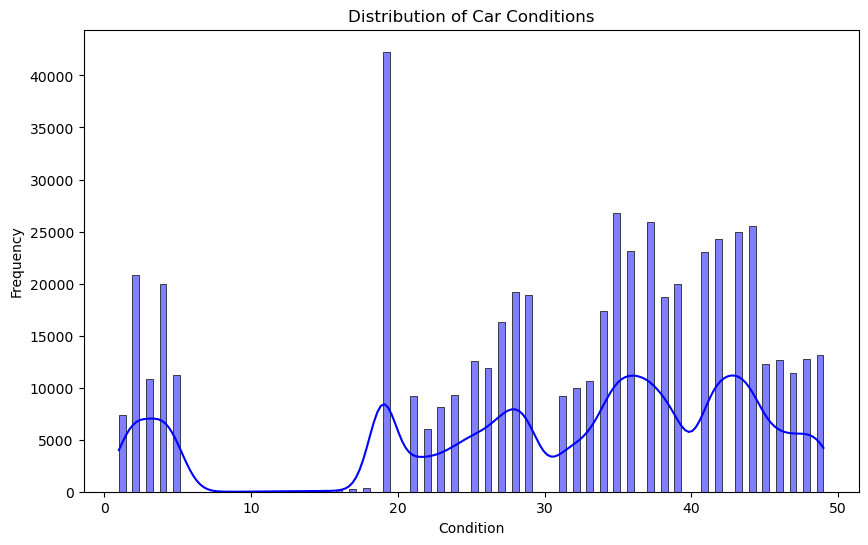

In [25]:
# Distribution of Car Conditions
plt.figure(figsize=(10, 6))
sns.histplot(df['condition'], kde=True, color='blue')
plt.title('Distribution of Car Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()


/var/folders/9k/41gdpqkn1k78lnr8m6rpxj200000gn/T/ipykernel_87793/4202549345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='transmission', y='sellingprice', data=filtered_df, palette='muted')


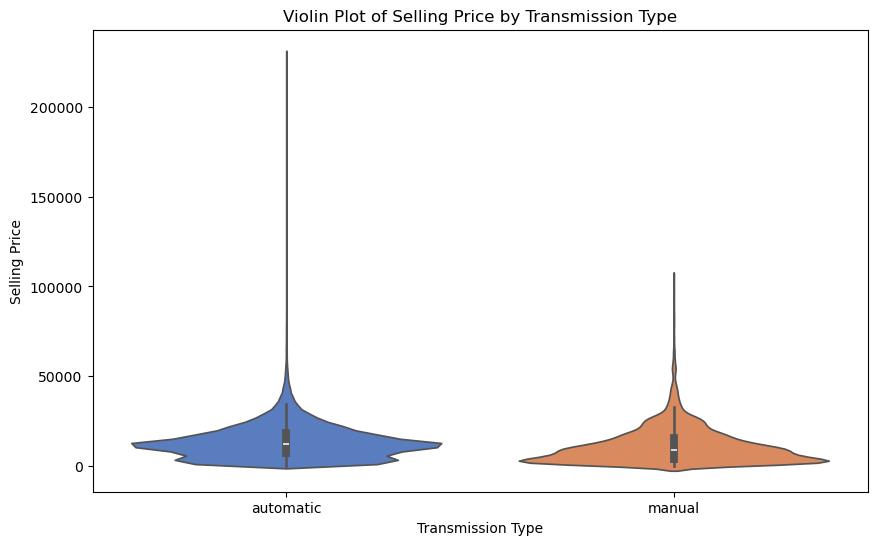

In [69]:
# Adding a Violin Plot for Selling Price by Transmission Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='transmission', y='sellingprice', data=filtered_df, palette='muted')
plt.title('Violin Plot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


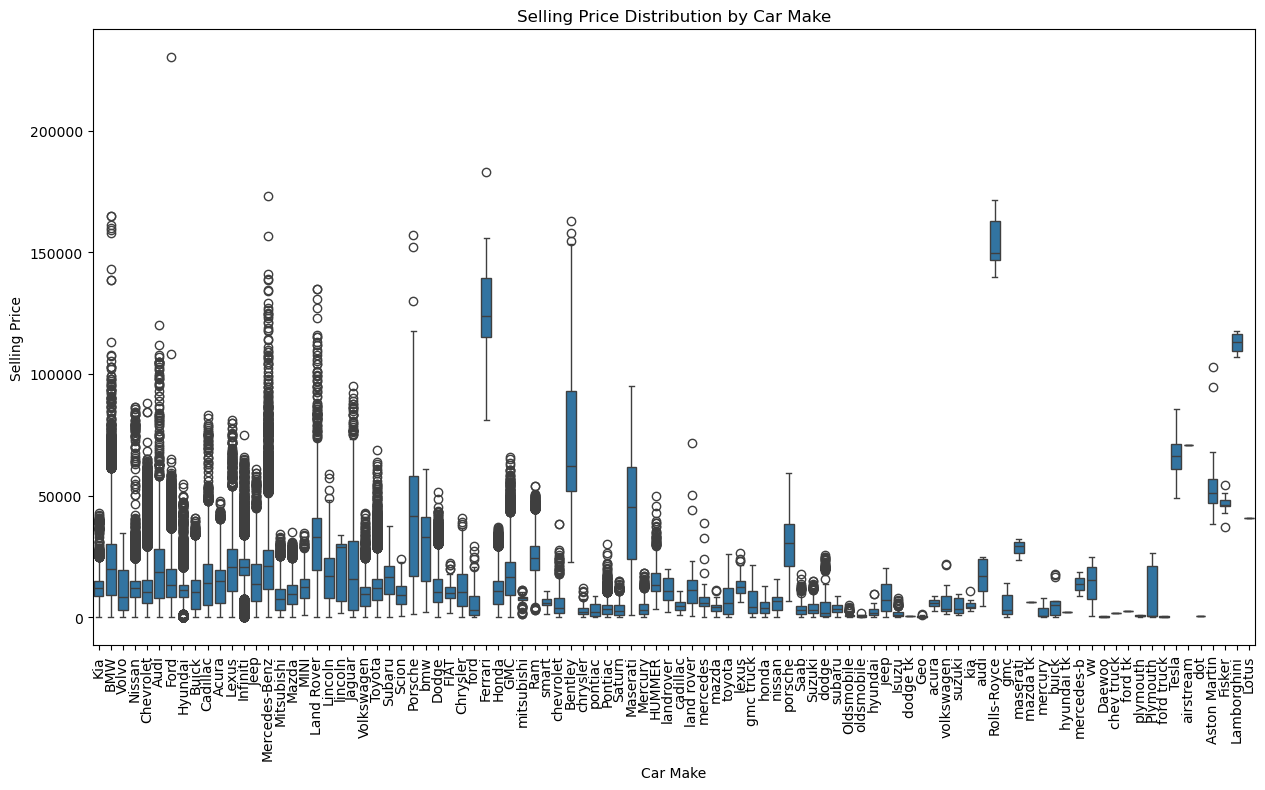

In [37]:
# Box plot of Selling Price by Car Make
plt.figure(figsize=(15, 8))
sns.boxplot(x='make', y='sellingprice', data=df)
plt.xticks(rotation=90)
plt.title('Selling Price Distribution by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.show()

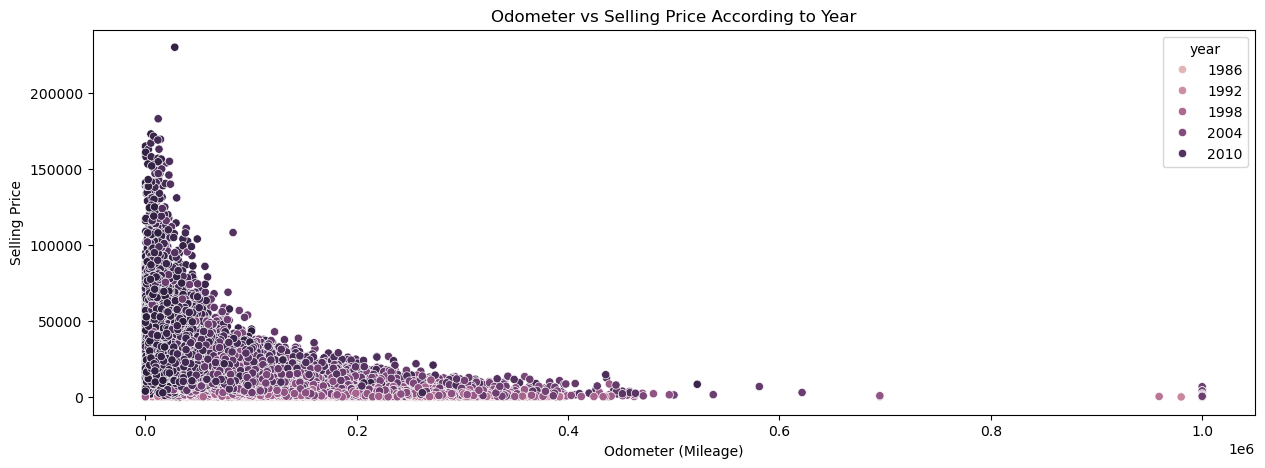

In [75]:
# Scatter Plot for Odometer vs Selling Price According to Year

plt.figure(figsize=(15, 5)) 
sns.scatterplot(x='odometer', y='sellingprice', data=df, hue='year')  
plt.title('Odometer vs Selling Price According to Year') 
plt.xlabel('Odometer (Mileage)') 
plt.ylabel('Selling Price')  
plt.show()  

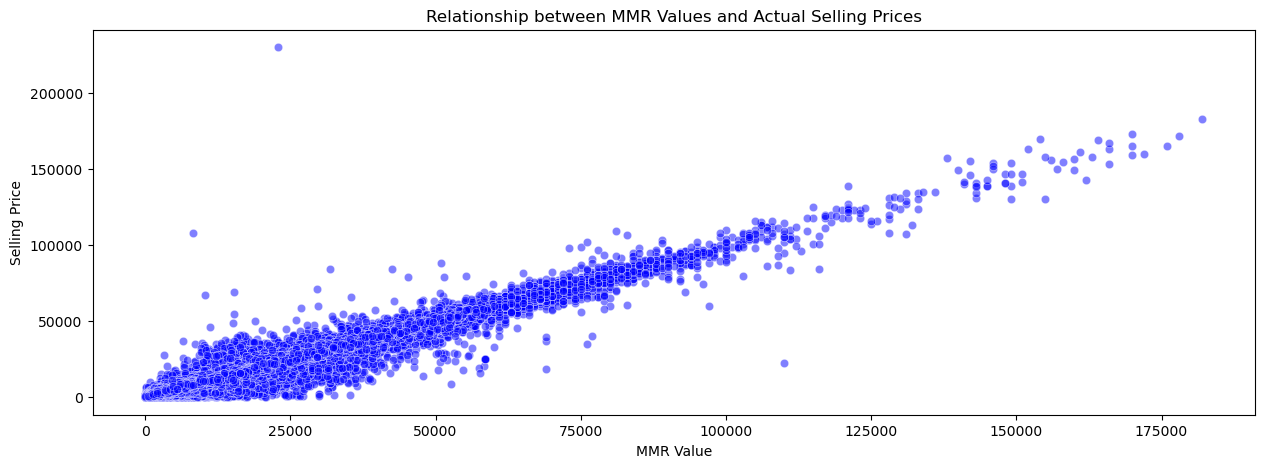

In [79]:
plt.figure(figsize=(15, 5)) 
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.5, color='blue') 
plt.title('Relationship between MMR Values and Actual Selling Prices')
plt.xlabel('MMR Value') 
plt.ylabel('Selling Price')  
plt.show()  


/var/folders/9k/41gdpqkn1k78lnr8m6rpxj200000gn/T/ipykernel_87793/2972498068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='sellingprice', data=filtered_df, palette='Set2')


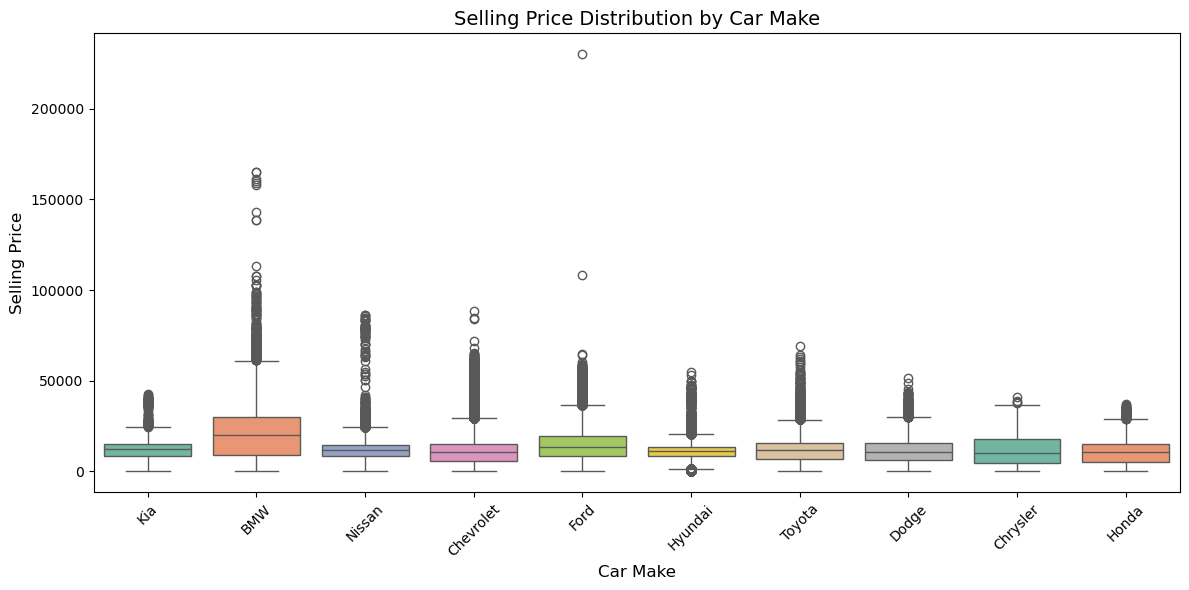

In [83]:
# Filter out less common car makes for clarity
top_makes = df['make'].value_counts().index[:10]  # Show only the top 10 makes
filtered_df = df[df['make'].isin(top_makes)]

# Set a larger figure size for better readability
plt.figure(figsize=(12, 6))

# Create the box plot for selling price distribution by car make with filtered data
sns.boxplot(x='make', y='sellingprice', data=filtered_df, palette='Set2')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=10)

# Set a title and labels
plt.title('Selling Price Distribution by Car Make', fontsize=14)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


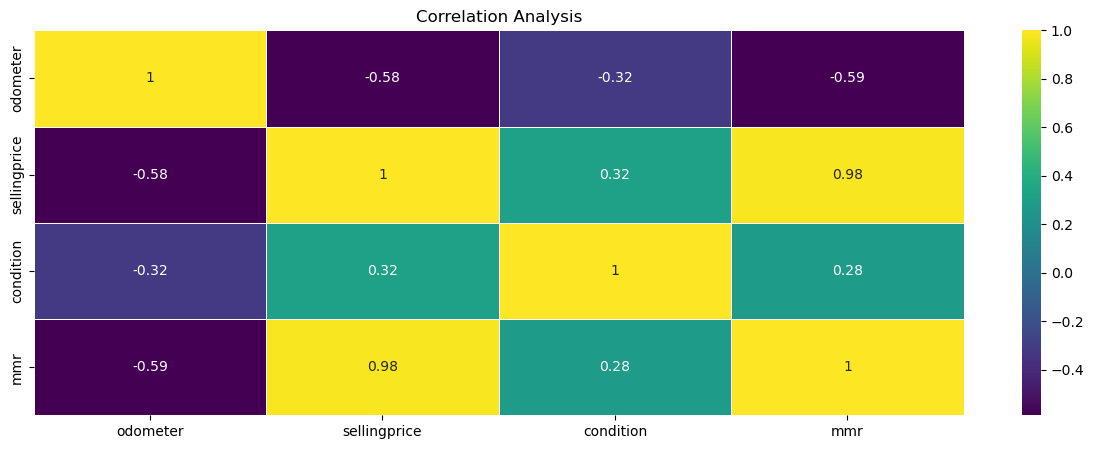

In [53]:
# Correlation analysis for dataset
# Selecting relevant columns for correlation analysis
corr_rel = df[['odometer', 'sellingprice', 'condition', 'mmr']].corr()


# Heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr_rel, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

Summary of Key Insights:
- Distribution of Odometer Readings:
The majority of vehicles have low mileage, with most odometer readings falling between 0 and 100,000 miles. This indicates that the dataset is primarily composed of relatively newer or less-used vehicles, which are likely to command higher prices.
- Distribution of Car Conditions:
Most vehicles have a condition rating clustered between 30 and 40, with few outliers. This suggests that while many cars are in good condition, a notable portion falls outside the typical range, potentially affecting their resale value.
- Selling Price Trends:
Selling prices are mostly concentrated between $6,000 and $18,000, with some high-end outliers. This distribution indicates a strong market for mid-range priced vehicles.
- Impact of Transmission Type on Selling Price:
Automatic transmission vehicles tend to have a wider and higher price range compared to manual transmission vehicles. This reflects a market preference for automatic cars, which should be considered in inventory and pricing strategies.
- Relationship Between Odometer and Selling Price:
A negative correlation is observed between odometer readings and selling prices. As mileage increases, the selling price tends to decrease, emphasizing the importance of low mileage in vehicle valuation.
- MMR Values vs. Actual Selling Prices:
The MMR values are generally a good predictor of actual selling prices, but some deviations indicate potential negotiation opportunities. Using MMR as a reference can enhance pricing strategies.
- Popular Car Makes:
Brands like Toyota, Honda, and Ford dominate the sales, with luxury brands like BMW and Porsche exhibiting significantly higher price ranges. Stocking these popular brands can meet market demand and improve sales.
- Correlation Analysis:
The correlation heatmap shows a strong relationship between vehicle condition, MMR values, and selling prices, which can be leveraged to predict pricing trends and optimize inventory management.

Recommendations:
- Leverage MMR Values for Accurate Pricing:
Use MMR values as a benchmark to establish accurate selling prices. This will help in setting competitive prices, enhancing negotiation leverage, and maintaining buyer trust.
- Focus on Low Mileage and Good Condition Vehicles:
Emphasize the acquisition and sale of vehicles with lower mileage and better condition. Highlight these attributes in marketing to attract higher offers and maximize profitability.
- Optimize Inventory Based on Market Preferences:
Prioritize stocking popular makes and models like Toyota, Honda, and BMW. Adjust inventory to reflect consumer preferences for automatic transmission and mid-range priced vehicles to drive sales.
- Regularly Update Market Analysis:
Continuously monitor market trends and update the dataset to reflect changing consumer preferences and market dynamics. This will ensure that pricing and inventory strategies remain relevant and effective.

In [ ]:
brew install pandoc
